In [1]:
from monai.visualize import blend_images
from monai.transforms import Compose, Activations, AsDiscrete
import matplotlib.pyplot as plt
from monai.losses import DiceCELoss
from src.utils.train_utils import HardUnetTrainer
from src.data.ISLES_dataset import ISLESDataModule
from src.data.covid_dataset import CovidDataModule
from src.models.mseg_hardnet import HarDMSEG
import torch
import json
import pytorch_lightning as pl
from dvclive.lightning import DVCLiveLogger
import wandb
from pytorch_lightning.loggers.wandb import WandbLogger
import pytorch.nn as nn

In [2]:
pl.seed_everything(42, workers=True)
device = "cuda" if torch.cuda.is_available() else "cpu"
wandb.init(project="awa")

# datamodule = ISLESDataModule(data_properties=data, batch_size=1, device=device)
with open(fr'.\src\data\dataset.json', 'r') as file:
    data = json.load(file)
datamodule = ISLESDataModule(batch_size=64, data_properties=data)

# # Total image to read in. In this case, it's 10 (for both train and val). With split = 0.7, 7 wll go to train and 3 will go to val
datamodule.setup()

# #Loadin the data according to the upper parameters
train_loader = datamodule.train_dataloader()

for batch_idx, batch in enumerate(train_loader):
    print(batch["image"].shape)
    print(torch.unique(batch["label"]))
    break

unet = HarDMSEG(arch="85")
lr = 0.0015
opt = torch.optim.AdamW
sched = torch.optim.lr_scheduler.ConstantLR
loss = nn.BCELoss

model = HardUnetTrainer(model=unet, roi_size_h=64, roi_size_w=64, lr=lr, optim=opt, sched=sched)
logger = WandbLogger()

# initialize Lightning's trainer.
trainer = pl.Trainer(
    accelerator="gpu",
    devices=1,
    max_epochs=200,
    logger=logger,
    log_every_n_steps=1,
    check_val_every_n_epoch=20,
)

# train
trainer.fit(model, datamodule)
wandb.finish()

Seed set to 42
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: raditya-rohman2004. Use `wandb login --relogin` to force relogin


c:\Users\radit\AppData\Local\Programs\Python\Python312\Lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


torch.Size([16, 1, 192, 192])
tensor([0., 1.], dtype=torch.float64)


c:\Users\radit\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\utilities\parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\radit\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\loggers\wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type       | Params | Mode 
--------------------------------------------
0 | net  | HarDMSEG   | 37.6 M | train
1 | loss | DiceCELoss | 0      | train
--------------------------------------------
37.6 M    Trainable params
0         N

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\radit\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\radit\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


epoch,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇█
mean_train_dice,▅▅▆▁▆▅▅▆▆▆▅▆▆▃▇▁▅▅▇▃▆▆▅█▅▂▆▂▆▅█▇▇▆▆▁▆▆▇▄
train_loss,█▄▄▂▄▂▃▃▃▃▅▄▂▃▂▁▂▅▃▃▄▃▃▃▃▂▂▂▂▂▃▃▃▄▃▃▂▂▂▂
trainer/global_step,▁▁▁▂▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█
val_dice,▆▃▅▆▃▅▁▇▄█
epoch,199
mean_train_dice,0.83939
train_loss,0.83914
trainer/global_step,35999
val_dice,0.64122


------------ INDEX:  0 ----------------


<Figure size 640x480 with 0 Axes>

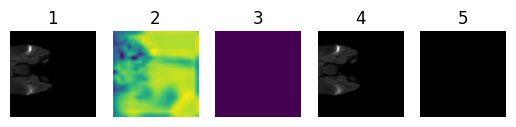

------------ INDEX:  1 ----------------


<Figure size 640x480 with 0 Axes>

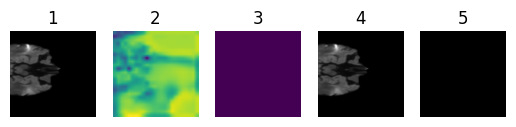

------------ INDEX:  2 ----------------


<Figure size 640x480 with 0 Axes>

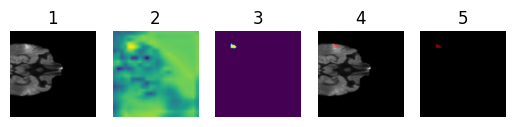

------------ INDEX:  3 ----------------


<Figure size 640x480 with 0 Axes>

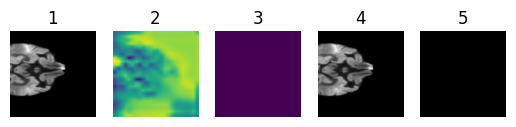

------------ INDEX:  4 ----------------


<Figure size 640x480 with 0 Axes>

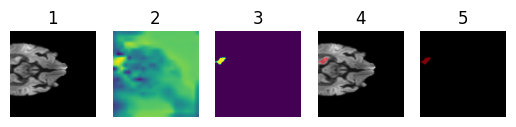

------------ INDEX:  5 ----------------


<Figure size 640x480 with 0 Axes>

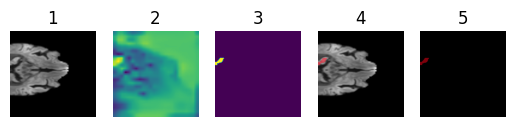

------------ INDEX:  6 ----------------


<Figure size 640x480 with 0 Axes>

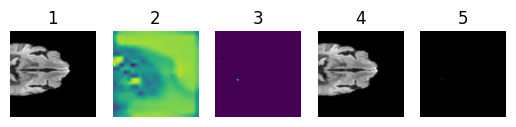

------------ INDEX:  7 ----------------


<Figure size 640x480 with 0 Axes>

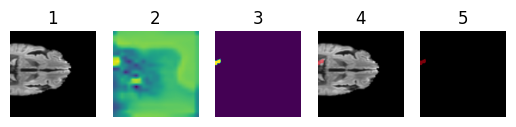

------------ INDEX:  8 ----------------


<Figure size 640x480 with 0 Axes>

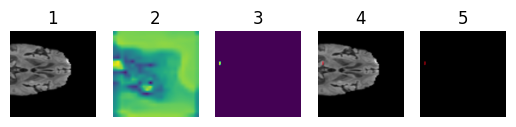

------------ INDEX:  9 ----------------


<Figure size 640x480 with 0 Axes>

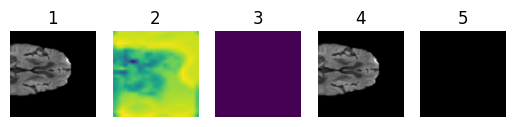

------------ INDEX:  10 ----------------


<Figure size 640x480 with 0 Axes>

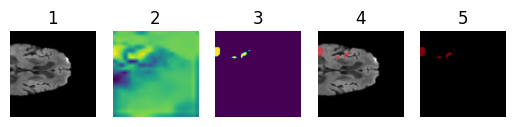

In [3]:
post_trans = Compose([Activations(sigmoid=True), AsDiscrete(threshold=0.5)])
train_loader = datamodule.train_dataloader()
val_loader = datamodule.val_dataloader()
count = 0
unet = unet.to(device)
for val_data in val_loader:
    if count == 11:
          break
    print("------------ INDEX: ", count, "----------------")
    val_images, val_labels = val_data["image"].float().to(device), val_data["label"].float().to(device)
    blend_img = blend_images(val_images[0],val_labels[0])
    outputs = unet(val_images)
    post_trans_output = [post_trans(i) for i in outputs]
    blend_out = blend_images(val_images[0],post_trans_output[0])
    blend_check = blend_images(val_labels[0],post_trans_output[0])

    plt.figure()
    f, axarr = plt.subplots(1,5)
    axarr[0].imshow((blend_img.cpu()).permute(1, 2, 0))
    axarr[0].set_title("1")
    axarr[0].set_axis_off()

    axarr[1].imshow((outputs[0].detach().cpu()).permute(1, 2, 0))
    axarr[1].set_title("2")
    axarr[1].set_axis_off()

    axarr[2].imshow((post_trans_output[0].detach().cpu()).permute(1, 2, 0))
    axarr[2].set_title("3")
    axarr[2].set_axis_off()

    axarr[3].imshow((blend_out.cpu()).permute(1, 2, 0))
    axarr[3].set_title("4")
    axarr[3].set_axis_off()

    axarr[4].imshow((blend_check.cpu()).permute(1, 2, 0))
    axarr[4].set_title("5")
    axarr[4].set_axis_off()
    plt.show()
    count+=1